In [87]:
from pandas import DataFrame
from IPython.display import HTML
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import pandas as pd 
from collections import Counter



ps = PorterStemmer()

import pandas as pd 
df = pd.read_csv("P2Sample2.csv", encoding= 'unicode_escape')
df.fillna(0)
pd.options.display.max_rows = 4000
df['Type'] = df['Type'].str.replace('Spam','1')
df['Type'] = df['Type'].str.replace('Quality','0')

# spam = df.loc[df["Type"]=='1']
# quality = df.loc[df["Type"]=='0']


# ht = HTML(df.to_html())
# display(ht)
#print(df["Type"].value_counts())



    


In [88]:

# spam = df.loc[df["Type"]=='1']
# quality = df.loc[df["Type"]=='0']

# spamTweets = spam["Tweet"]
# spamwords = []
# for sentence in spamTweets:
#     for word in word_tokenize(sentence):
#         stemmed_word = ps.stem(word)
#         spamwords.append(stemmed_word)
# spamwords

frequent_spamwords = ['trump', 'news', 'polic', 'break', 'man', 'obama', 'polit', 'world', 'kill',
'sport','sport','state', 'amp', 'hillari','fire', 'local','against',
'white', 'support', 'report', 'u.s.','shoot','attack','hous','american',
'woman','offic','america','media','arrest','cop','liber','home','democrat',
'down','crash','elect','shot','gop','dead','court','suspect','investig',
'crime','busi','death','maga','fight','gun','north','south','million',
'tcot','women','realdonaldtrump','nation','doe','bill','counti'] 

# qualityTweets = quality["Tweet"]
# qualitywords = []
# for sentence in qualityTweets:
#     for word in word_tokenize(sentence):
#         stemmed_word = ps.stem(word)
#         qualitywords.append(stemmed_word)
# qualitywords

frequent_qualitywords = ['love', 'thank','happi', 'good','got','some','think','feel','come',
'pleas','pleas','u','birthday','na','realli','life','been', 'even','ca',
'girl','great','last','much',"'ll","'ve",'never','best','lol','still',
'alway','way','give','post','too','check','start','am','someon','im',
'2016','where','job','off','week','miss','shit','lot','talk','follow',
'free','guy','ani','>','music','stop','fuck','becaus','leav','person',
'photo']

# cq = Counter(qualitywords)
# print(cq.most_common(200))
# print("__________________________________________________-")
# c = Counter(spamwords)
# print(c.most_common(200))


In [89]:
Tweets = df["Tweet"]
words = []
wordrateCol = []
hashtagsCol = []
linksCol = []
i = 0
for tweet in Tweets:
    wordrate = 0
    hashtags = 0
    links = 0
    for word in word_tokenize(tweet):
        stemmed_word = ps.stem(word)
        if stemmed_word in frequent_spamwords:
            wordrate = wordrate + 1
        elif stemmed_word in frequent_qualitywords:
            wordrate = wordrate - 1
        if stemmed_word == '#':
            hashtags = hashtags + 1
        if stemmed_word == 'http':
            links = links + 1
    
    wordrateCol.append(wordrate)
    hashtagsCol.append(hashtags)
    linksCol.append(links)
    i = i + 1
    
print(type(wordrateCol[9]))
df['wordrate'] = wordrateCol
df['hashtags'] = hashtagsCol
df['links'] = linksCol

dfnew = df.drop('Type',axis='columns')
dfnew = df.drop('Tweet',axis='columns')
dfnew['Type'] = df["Type"]
df = dfnew

# ht = HTML(df.to_html())
# display(ht)


<class 'int'>


In [90]:
#df.drop(df.index[df['following'] == 'How to use it'], inplace=True)
df['Type'] = df['Type'].fillna(0)
df['following'] = df['following'].fillna(0)
df['actions'] = df['actions'].fillna(0)
df['is_retweet'] = df['is_retweet'].fillna(0)
df['followers'] = df['followers'].fillna(0)
df['Reputation'] = df['Reputation'].str.replace('#DIV/0!','0')
df[:20]

,Id,following,followers,Reputation,actions,is_retweet,Type,wordrate,hashtags,links
0,3697,3319.0,611.0,0.155470738,294.0,0.0,1,1,1,2
1,10740,4840.0,1724.0,0.262644729,1522.0,0.0,1,0,0,1
2,9572,4435.0,16041.0,0.783404962,27750.0,0.0,1,0,0,1
3,10963,9025.0,20165.0,0.690818774,6331.0,0.0,1,1,0,2
4,5401,780.0,897.0,0.534883721,4792.0,1.0,1,-1,2,2
5,7636,1893.0,1651.0,0.465857788,3564.0,1.0,1,3,3,2
6,6908,7981.0,12815.0,0.616224274,13601.0,1.0,1,0,0,1
7,10433,85.0,73.0,0.462025317,434.0,0.0,1,0,3,0
8,4941,856.0,1093.0,0.560800411,6219.0,1.0,1,0,0,2
9,7237,456.0,821.0,0.642913078,5797.0,1.0,1,0,1,0


In [91]:
target = df.Type
inputs = df.drop('Type',axis='columns')
target

0        1
1        1
2        1
3        1
4        1
        ..
11963    0
11964    0
11965    0
11966    0
11967    0
Name: Type, Length: 11968, dtype: object

In [92]:
#inputs.columns[inputs.isna().any()]

In [93]:
X = inputs
y = target

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.2)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9574, 9)
(2394, 9)
(9574,)
(2394,)


In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
print("Score = ")
print(model.score(X_test, y_test))


1.0

In [66]:
y_predicted = model.predict(X_test)
HTML(X_test.to_html())
print(X_test[:10])
print(y_predicted[:10])

         Id  Hashtags:  terrorism  following  followers  \
9488   4674        0.0        0.0        0.0        0.0   
9489   3959        0.0        0.0        0.0        0.0   
800    6241        0.0        0.0     1130.0      649.0   
8059   7994        0.0        0.0        0.0        0.0   
3557   3749        0.0        0.0     2728.0     2367.0   
2574  12463        0.0        0.0    11001.0    35201.0   
9834  10814        0.0        0.0        0.0        0.0   
5789   8705        0.0        0.0     8636.0    12296.0   
6283   9134        0.0        0.0        0.0        0.0   
4142   9766        0.0        0.0    10608.0    20531.0   

     Reputation (Followers/ Followers + Following)  actions  is_retweet  
9488                                             0     14.0         0.0  
9489                                             0      0.0         0.0  
800                                    0.364811692   1299.0         1.0  
8059                                             0    

In [67]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[1230,    1],
       [   3, 1160]], dtype=int64)

In [46]:
len(y_test)

2394

Text(69.0, 0.5, 'Truth')

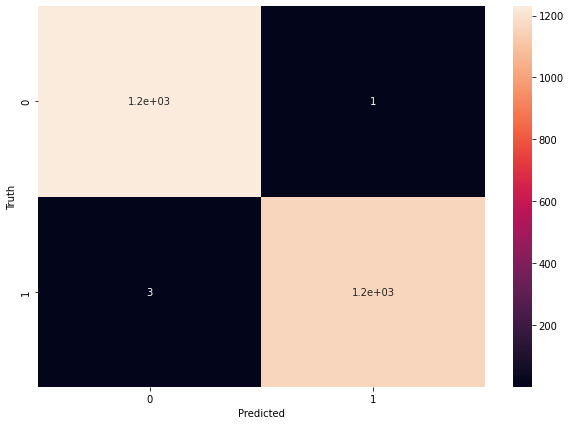

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
y_test[:15]

10587    0
11175    0
8603     0
8640     0
1        1
2461     1
8033     0
1579     1
836      1
2491     1
346      1
1438     1
11182    0
462      1
5705     1
Name: Type, dtype: object

In [49]:
y_predicted[:15]

array(['0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0',
       '1', '1'], dtype=object)